### マハラノビス＝タグチ法による異常検知
- マハラノビス＝タグチ法 : マハラノビス距離およびタグチ指標で異常度を算出する
    - 利点：異常データに寄与した変数を評価できること

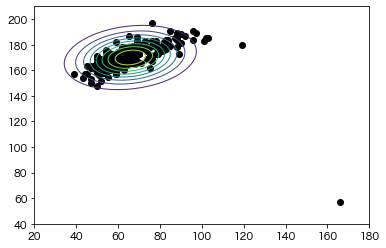

Taguchi score is:
[10.96333432 -1.58498805]


In [1]:
# coding: utf-8

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
from numpy import linalg as la
from scipy.stats import norm
import seaborn as sns
from matplotlib import cm

davis = pd.read_csv('./../data/Davis.csv').values
d = davis[: ,2:4]

plt.scatter( d[:,0], d[:,1],color='black')
plt.xlim(20,180)
plt.ylim(40,210)
#sns.kdeplot( x[:,0], x[:,1],kernel='gaus')


x =  np.arange(20, 180,1)
y =  np.arange(40, 210,1)
X, Y = np.meshgrid(x, y)
mx = d.mean(axis = 0)
xc = d - mx
sx = ( xc.T.dot(xc) / d[:,0].size ).astype(float)
f = lambda x, y: scipy.stats.multivariate_normal(mx, sx).pdf([x, y])
Z = np.vectorize(f)(X, Y)
plt.contour(X, Y, Z,levels=10,linewidths=1)
plt.show()

# データ中心化
mx = d.mean(axis = 0)
xc = d - mx
# 標本共分散行列
sx = ( xc.T.dot(xc) / d[:,0].size ).astype(float)



#タグチ指標の計算（例として、20番目のデータのタグチ指標を算出）

SN = (xc[20]**2 )/np.diag(sx) # 対角成分（各変数の分散）を取り出し、SN値を算出
SN = SN.astype(np.float64)

MT = 10*np.log10(SN)

print ('Taguchi score is:')
print (MT)
